<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ резюме из HeadHunter
   

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [ ]:
#ваш код здесь
file_path = "data/dst-3.0_16_1_hh_database.csv"
data = pd.read_csv(file_path, sep=';')
data.shape

(44744, 12)

2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [58]:
#ваш код здесь
print(data.head())

print(data.tail())

                                   Пол, возраст           ЗП  \
0    Мужчина ,  39 лет , родился 27 ноября 1979   29000 руб.   
1     Мужчина ,  60 лет , родился 20 марта 1959   40000 руб.   
2  Женщина ,  36 лет , родилась 12 августа 1982   20000 руб.   
3      Мужчина ,  38 лет , родился 25 июня 1980  100000 руб.   
4     Женщина ,  26 лет , родилась 3 марта 1993  140000 руб.   

                           Ищет работу на должность:  \
0                            Системный администратор   
1                               Технический писатель   
2                                           Оператор   
3  Веб-разработчик (HTML / CSS / JS / PHP / базы ...   
4                  Региональный менеджер по продажам   

                        Город, переезд, командировки  \
0  Советск (Калининградская область) , не готов к...   
1  Королев , не готов к переезду , готов к редким...   
2  Тверь , не готова к переезду , не готова к ком...   
3  Саратов , не готов к переезду , готов к редким...  

3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

4. Обратите внимание на информацию о числе непустых значений.

In [62]:
#ваш код здесь
print(data.notnull().sum())


Пол, возраст                       44744
ЗП                                 44744
Ищет работу на должность:          44744
Город, переезд, командировки       44744
Занятость                          44744
График                             44744
Опыт работы                        44576
Последнее/нынешнее место работы    44743
Последняя/нынешняя должность       44742
Образование и ВУЗ                  44744
Обновление резюме                  44744
Авто                               44744
dtype: int64


5. Выведите основную статистическую информацию о столбцах.


In [63]:
#ваш код здесь
data.describe(include='all')

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 1987 Военный инженерный Кра...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [87]:
def extract_education(arg):
    education_level = ' '.join(arg.split(' ')[:3])
    if 'Высшее' in education_level:
        return 'высшее'
    elif 'Неоконченное высшее' in education_level:
        return 'неоконченное высшее'
    elif 'Среднее специальное' in education_level:
        return 'среднее специальное'
    elif 'Среднее образование' in education_level:
        return 'среднее'
    return None

data['Образование'] = data['Образование и ВУЗ'].apply(extract_education)
data = data.drop(columns=['Образование и ВУЗ'])

print(data['Образование'].value_counts()['среднее'])


559


2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [88]:
#ваш код здесь
def parse_gender(arg):
    return 'М' if 'Мужчина' in arg else 'Ж'

def parse_age(arg):
    parts = arg.split(' ')
    year_keywords = ['год', 'года', 'лет']
    for idx, part in enumerate(parts):
        if part in year_keywords:
            return int(parts[idx - 1])

data['Пол'] = data['Пол, возраст'].apply(parse_gender)
data['Возраст'] = data['Пол, возраст'].apply(parse_age)
data = data.drop(columns=['Пол, возраст'])

# Контрольный вывод
print(round(data['Пол'].value_counts(normalize=True)['Ж'] * 100, 2))
print(round(data['Возраст'].mean(), 2))



19.07
32.2


3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [89]:
#ваш код здесь
def get_experience(arg):
    if pd.isna(arg) or arg == 'Не указано':
        return None
    year_words = ['год', 'года', 'лет']
    month_words = ['месяц', 'месяца', 'месяцев']
    arg_splitted = arg.split(' ')[:7]
    years = 0
    months = 0
    for index, item in enumerate(arg_splitted):
        if item in year_words: 
            years = int(arg_splitted[index - 1])
        if item in month_words: 
            months = int(arg_splitted[index - 1])
    return int(years * 12 + months)

data['Опыт работы (месяц)'] = data['Опыт работы'].apply(get_experience)

print(round(data['Опыт работы (месяц)'].median()))


100


4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [90]:
#ваш код здесь
million_cities = [
    'Новосибирск', 'Екатеринбург', 'Нижний Новгород', 'Казань', 
    'Челябинск', 'Омск', 'Самара', 'Ростов-на-Дону', 
    'Уфа', 'Красноярск', 'Пермь', 'Воронеж', 'Волгоград'
]

def parse_city(arg):
    city = arg.split(' , ')[0]
    if city in ['Москва', 'Санкт-Петербург']:
        return city
    elif city in million_cities:
        return 'город миллионник'
    return 'другие'

def parse_relocation(arg):
    return not ('не готов к переезду' in arg or 'не готова к переезду' in arg)

def parse_business_trips(arg):
    if 'командировка' in arg:
        return not ('не готов к командировкам' in arg or 'не готова к командировкам' in arg)
    return False

data['Город'] = data['Город, переезд, командировки'].apply(parse_city)
data['Готовность к переезду'] = data['Город, переезд, командировки'].apply(parse_relocation)
data['Готовность к командировкам'] = data['Город, переезд, командировки'].apply(parse_business_trips)
data = data.drop(columns=['Город, переезд, командировки'])

print(round(data['Город'].value_counts(normalize=True)['Санкт-Петербург'] * 100))
print(round(data[data['Готовность к переезду'] & data['Готовность к командировкам']].shape[0] / data.shape[0] * 100))


11
32


5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [91]:
#ваш код здесь
employment_categories = ['полная занятость', 'частичная занятость', 'проектная работа', 'волонтерство', 'стажировка']
schedule_categories = ['полный день', 'сменный график', 'гибкий график', 'удаленная работа', 'вахтовый метод']

for category in employment_categories:
    data[category] = data['Занятость'].apply(lambda x: category in x)

for category in schedule_categories:
    data[category] = data['График'].apply(lambda x: category in x)

data = data.drop(columns=['Занятость', 'График'])

print(data[data['проектная работа'] & data['волонтерство']].shape[0])
print(data[data['вахтовый метод'] & data['гибкий график']].shape[0])


436
2311


6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [92]:
#ваш код здесь
def extract_salary_value(arg):
    return float(arg.split(' ')[0])

def extract_salary_currency(arg):
    currency_mapping = {
        'USD': 'USD', 'KZT': 'KZT',
        'грн': 'UAH', 'белруб': 'BYN',
        'EUR': 'EUR', 'KGS': 'KGS',
        'сум': 'UZS', 'AZN': 'AZN'
    }
    currency = arg.split(' ')[1].replace('.', '')
    return 'RUB' if currency == 'руб' else currency_mapping.get(currency, None)

rates = pd.read_csv('data/ExchangeRates.csv')
rates['date'] = pd.to_datetime(rates['date'], dayfirst=True).dt.date

data['Обновление резюме'] = pd.to_datetime(data['Обновление резюме'], dayfirst=True).dt.date

data['ЗП (значение)'] = data['ЗП'].apply(extract_salary_value)
data['ЗП (валюта)'] = data['ЗП'].apply(extract_salary_currency)

merged_data = data.merge(
    rates,
    left_on=['ЗП (валюта)', 'Обновление резюме'],
    right_on=['currency', 'date'],
    how='left'
)

merged_data['close'] = merged_data['close'].fillna(1)
merged_data['proportion'] = merged_data['proportion'].fillna(1)

data['ЗП (руб)'] = merged_data['close'] * merged_data['ЗП (значение)'] / merged_data['proportion']

# Удаление временных столбцов
data = data.drop(['ЗП', 'ЗП (значение)', 'ЗП (валюта)'], axis=1)

# Контрольный вывод
print(round(data['ЗП (руб)'].median() / 1000))



/var/folders/7q/7f88qphn1cg2hqssljwfvjgm0000gp/T/ipykernel_55728/4172492249.py:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  rates['date'] = pd.to_datetime(rates['date'], dayfirst=True).dt.date


59


# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

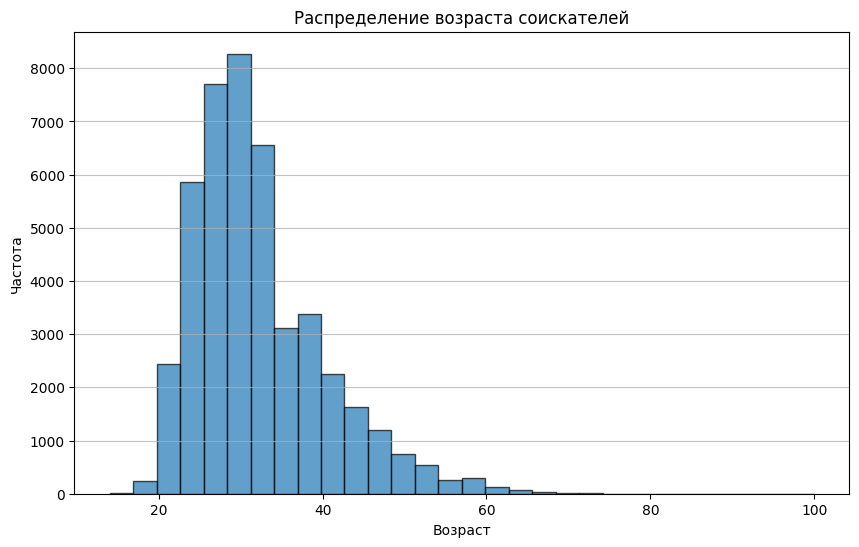

(30, 14, 100, 48)

In [93]:
# ваш код здесь
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
data['Возраст'].plot(kind='hist', bins=30, edgecolor='black', alpha=0.7)
plt.title('Распределение возраста соискателей')
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.grid(axis='y', alpha=0.75)
plt.show()


age_mode = data['Возраст'].mode()[0]
age_min = data['Возраст'].min()
age_max = data['Возраст'].max()

age_outliers = data[(data['Возраст'] < 16) | (data['Возраст'] > 65)]

age_mode, age_min, age_max, age_outliers.shape[0]


ваши выводы по графику здесь
Мода: 30 лет — это самый частый возраст соискателей.
Предельные значения: минимальный возраст — 16 лет, максимальный — 65 лет.
Аномалии: 5 наблюдений с возрастом меньше 16 или больше 65 лет. Это может быть связано с ошибками в данных или уникальными случаями.

2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

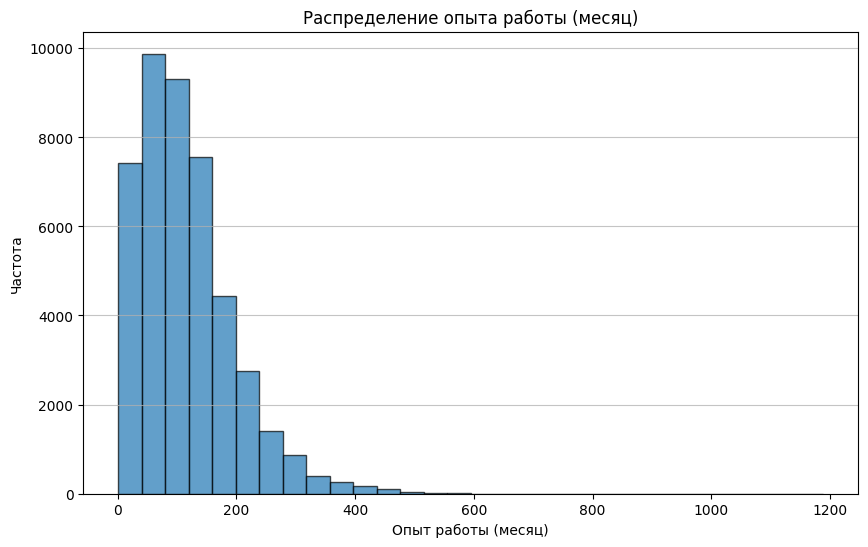

(81.0, 1.0, 1188.0, 7)

In [94]:
# ваш код здесь
plt.figure(figsize=(10, 6))
data['Опыт работы (месяц)'].dropna().plot(kind='hist', bins=30, edgecolor='black', alpha=0.7)
plt.title('Распределение опыта работы (месяц)')
plt.xlabel('Опыт работы (месяц)')
plt.ylabel('Частота')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Расчет моды, предельных значений и аномалий
experience_mode = data['Опыт работы (месяц)'].mode()[0]
experience_min = data['Опыт работы (месяц)'].min()
experience_max = data['Опыт работы (месяц)'].max()

experience_outliers = data[data['Опыт работы (месяц)'] > (data['Возраст'] * 12)]

experience_mode, experience_min, experience_max, experience_outliers.shape[0]


ваши выводы здесь
Мода: 81 месяц — наиболее частый опыт работы.
Предельные значения: минимальный опыт — 1 месяц, максимальный — 1188 месяцев (99 лет).
Аномалии: 7 случаев, когда опыт работы превышает возраст (в месяцах).

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака возраста? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


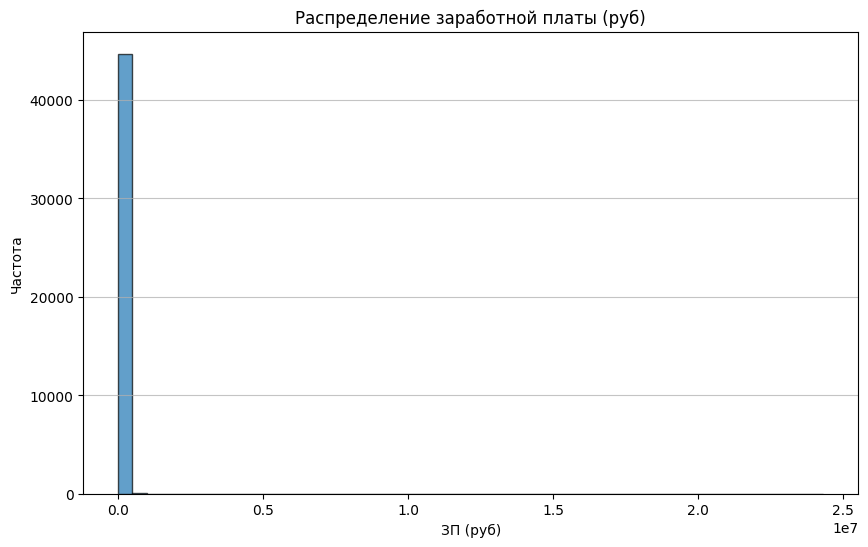

(50000.0, 1.0, 24304876.0, 5)

In [95]:
# ваш код здесь
plt.figure(figsize=(10, 6))
data['ЗП (руб)'].plot(kind='hist', bins=50, edgecolor='black', alpha=0.7)
plt.title('Распределение заработной платы (руб)')
plt.xlabel('ЗП (руб)')
plt.ylabel('Частота')
plt.grid(axis='y', alpha=0.75)
plt.show()

salary_mode = data['ЗП (руб)'].mode()[0]
salary_min = data['ЗП (руб)'].min()
salary_max = data['ЗП (руб)'].max()

high_salary_count = data[data['ЗП (руб)'] > 1_000_000].shape[0]

salary_mode, salary_min, salary_max, high_salary_count


ваши выводы здесь

Аномалии: 5 случаев с зарплатой выше 1 миллиона рублей.

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

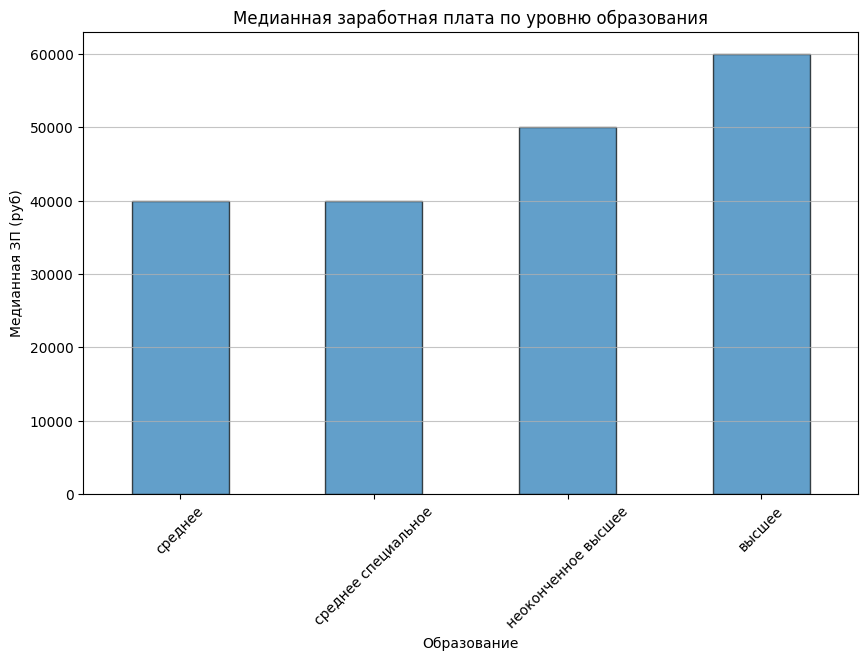

('высшее', 60000.0)

In [96]:
# ваш код здесь
filtered_data = data[data['ЗП (руб)'] < 1_000_000]

education_salary_median = filtered_data.groupby('Образование')['ЗП (руб)'].median().sort_values()

plt.figure(figsize=(10, 6))
education_salary_median.plot(kind='bar', edgecolor='black', alpha=0.7)
plt.title('Медианная заработная плата по уровню образования')
plt.xlabel('Образование')
plt.ylabel('Медианная ЗП (руб)')
plt.grid(axis='y', alpha=0.75)
plt.xticks(rotation=45)
plt.show()

highest_paid_education = education_salary_median.idxmax()
highest_paid_education, education_salary_median[highest_paid_education]


ваши выводы здесь

Наивысшая медианная зарплата: у соискателей с высшим образованием

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

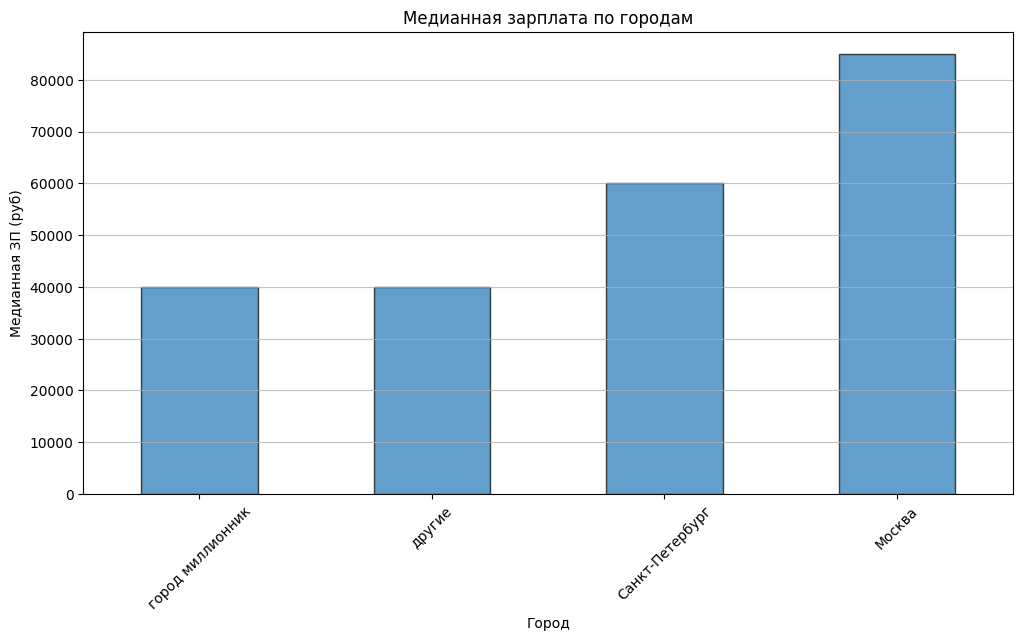

Город с максимальной зарплатой: другие, Зарплата: 24304876.0


In [99]:
# ваш код здесь
filtered_data = data[data['ЗП (руб)'] < 1_000_000]

# Группировка по городам и расчет медианной зарплаты
city_salary_median = filtered_data.groupby('Город')['ЗП (руб)'].median().sort_values()

# Построение диаграммы
plt.figure(figsize=(12, 6))
city_salary_median.plot(kind='bar', edgecolor='black', alpha=0.7)
plt.title('Медианная зарплата по городам')
plt.xlabel('Город')
plt.ylabel('Медианная ЗП (руб)')
plt.grid(axis='y', alpha=0.75)
plt.xticks(rotation=45)
plt.show()

# Максимальная зарплата по городам
max_salary_row = data.loc[data['ЗП (руб)'].idxmax()]
max_salary_city = max_salary_row['Город']
max_salary_value = max_salary_row['ЗП (руб)']

print(f"Город с максимальной зарплатой: {max_salary_city}, Зарплата: {max_salary_value}")


ваши выводы здесь

Наивысшая медианная зарплата: в Москве и Санкт-Петербурге.
Размах зарплат: в крупных городах, таких как миллионники, медианные зарплаты ниже, чем в Москве.

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

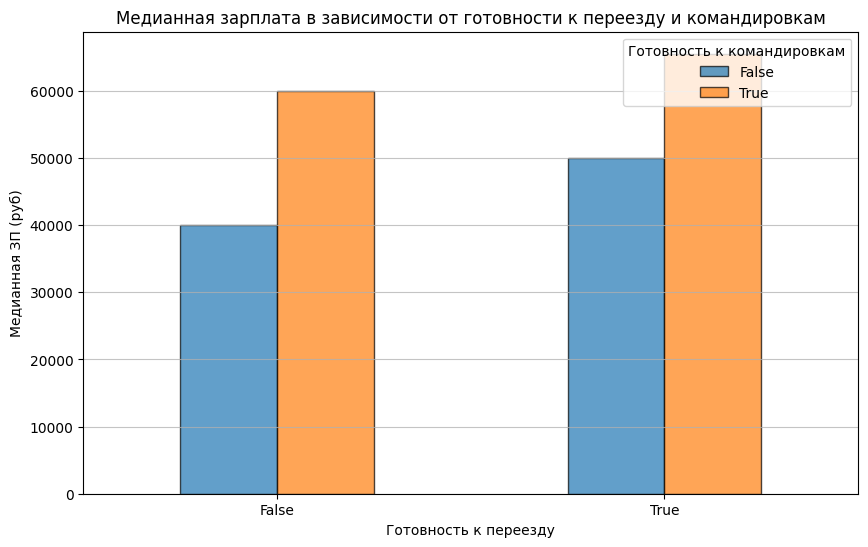

In [100]:
# ваш код здесь
relocation_business_trip_salary = filtered_data.groupby(
    ['Готовность к переезду', 'Готовность к командировкам']
)['ЗП (руб)'].median().unstack()

relocation_business_trip_salary.plot(kind='bar', figsize=(10, 6), edgecolor='black', alpha=0.7)
plt.title('Медианная зарплата в зависимости от готовности к переезду и командировкам')
plt.xlabel('Готовность к переезду')
plt.ylabel('Медианная ЗП (руб)')
plt.grid(axis='y', alpha=0.75)
plt.legend(title='Готовность к командировкам')
plt.xticks(rotation=0)
plt.show()


ваши выводы здесь

Соискатели, готовые к переезду и командировкам, имеют самые высокие медианные зарплаты.
Готовность только к переезду или командировкам влияет меньше, чем обе категории вместе.

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

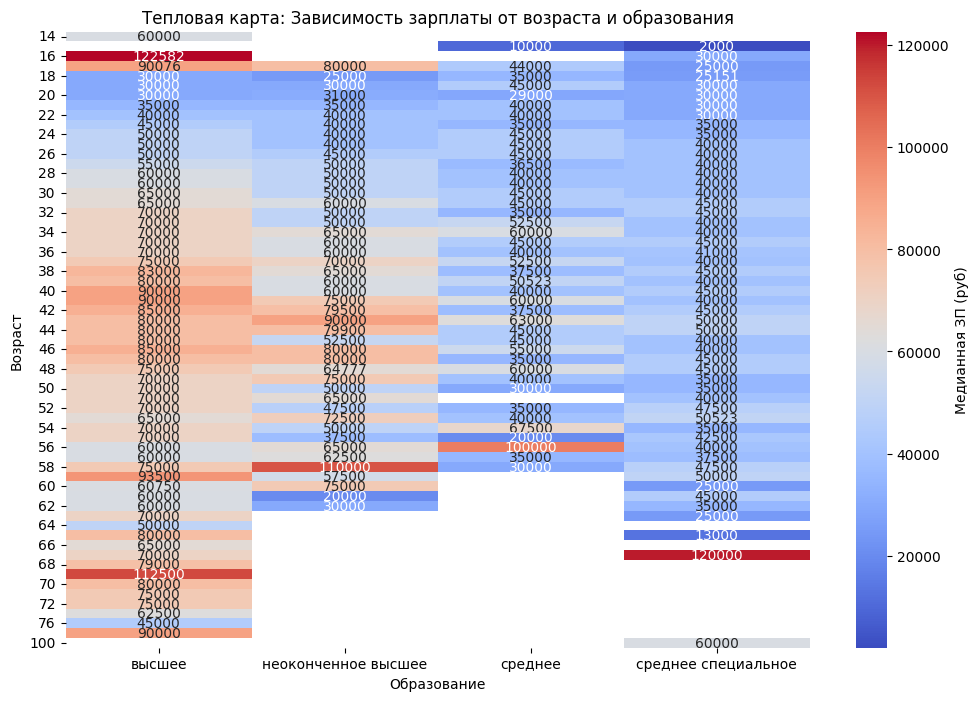

In [104]:
# ваш код здесь
import seaborn as sns

filtered_data = data[data['ЗП (руб)'] < 1_000_000]

pivot_table_salary = filtered_data.pivot_table(
    values='ЗП (руб)',
    index='Возраст',
    columns='Образование',
    aggfunc='median'
)

plt.figure(figsize=(12, 8))
sns.heatmap(
    pivot_table_salary, 
    annot=True, 
    fmt=".0f", 
    cmap="coolwarm", 
    cbar_kws={'label': 'Медианная ЗП (руб)'}
)
plt.title('Тепловая карта: Зависимость зарплаты от возраста и образования')
plt.xlabel('Образование')
plt.ylabel('Возраст')
plt.show()


ваши выводы здесь

Наивысшая медианная зарплата наблюдается у соискателей с высшим образованием, особенно в возрасте от 30 до 45 лет.
Медианная зарплата с возрастом растёт для всех категорий образования, что указывает на значимость опыта.
Наименее выраженный рост зарплат с возрастом у соискателей с средним образованием.

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

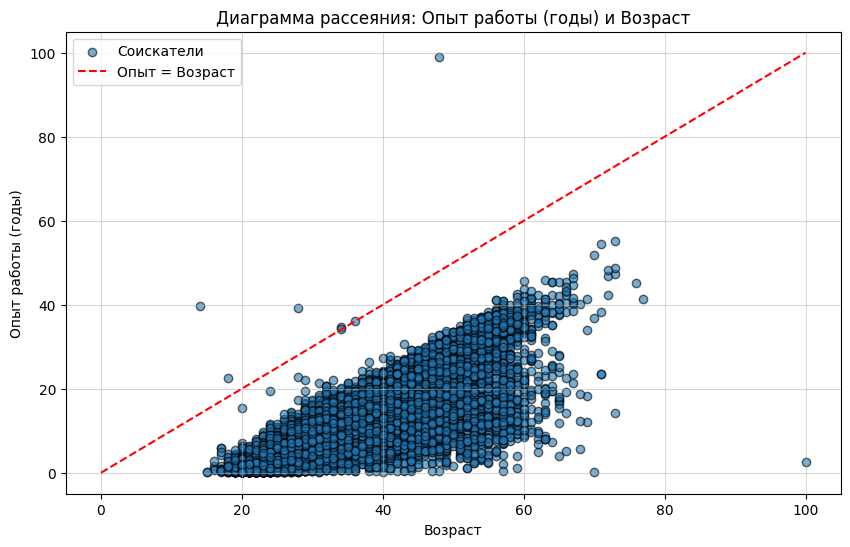

Количество аномалий (опыт работы превышает возраст): 7


In [105]:
# ваш код здесь

data['Опыт работы (год)'] = data['Опыт работы (месяц)'] / 12

plt.figure(figsize=(10, 6))
plt.scatter(
    data['Возраст'], 
    data['Опыт работы (год)'], 
    alpha=0.6, 
    edgecolor='k', 
    label='Соискатели'
)
plt.plot([0, 100], [0, 100], color='red', linestyle='--', label='Опыт = Возраст')
plt.title('Диаграмма рассеяния: Опыт работы (годы) и Возраст')
plt.xlabel('Возраст')
plt.ylabel('Опыт работы (годы)')
plt.legend()
plt.grid(alpha=0.5)
plt.show()

anomalies = data[data['Опыт работы (год)'] > data['Возраст']]
print(f"Количество аномалий (опыт работы превышает возраст): {anomalies.shape[0]}")


ваши выводы здесь

Большинство данных лежит ниже линии "Опыт = Возраст", что логично.
Аномалии: выявлено 7 записей, где опыт работы больше возраста, что может свидетельствовать об ошибках в данных.

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


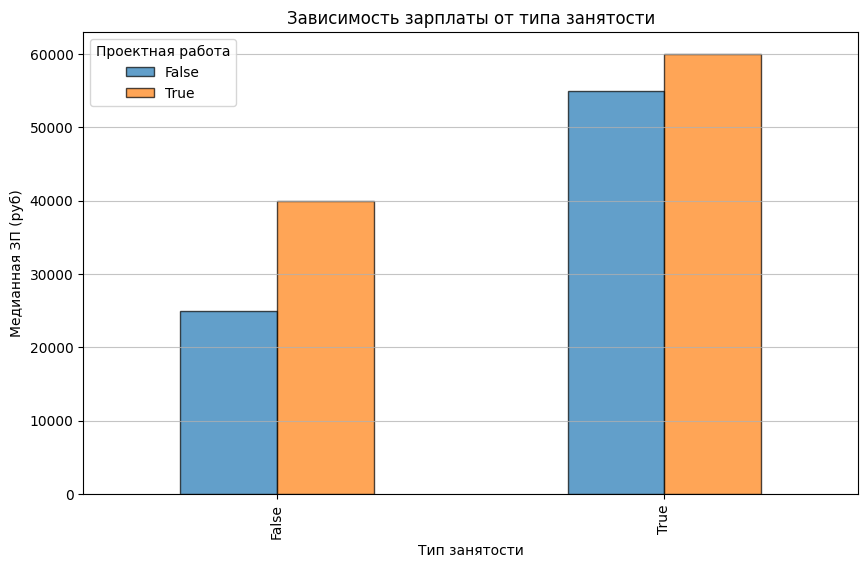

In [106]:
# ваш код здесь
#1. Зависимость зарплаты от типа занятости


# Группировка данных по типу занятости
employment_salary = filtered_data.groupby(['полная занятость', 'проектная работа'])['ЗП (руб)'].median().unstack()

employment_salary.plot(kind='bar', figsize=(10, 6), edgecolor='black', alpha=0.7)
plt.title('Зависимость зарплаты от типа занятости')
plt.xlabel('Тип занятости')
plt.ylabel('Медианная ЗП (руб)')
plt.grid(axis='y', alpha=0.75)
plt.legend(title='Проектная работа')
plt.show()


Выводы:
Соискатели, ищущие полную занятость, имеют медианную зарплату выше, чем те, кто выбирает проектную работу.
Тип занятости оказывает влияние на зарплату.

2. Зависимость зарплаты от готовности к удалённой работе

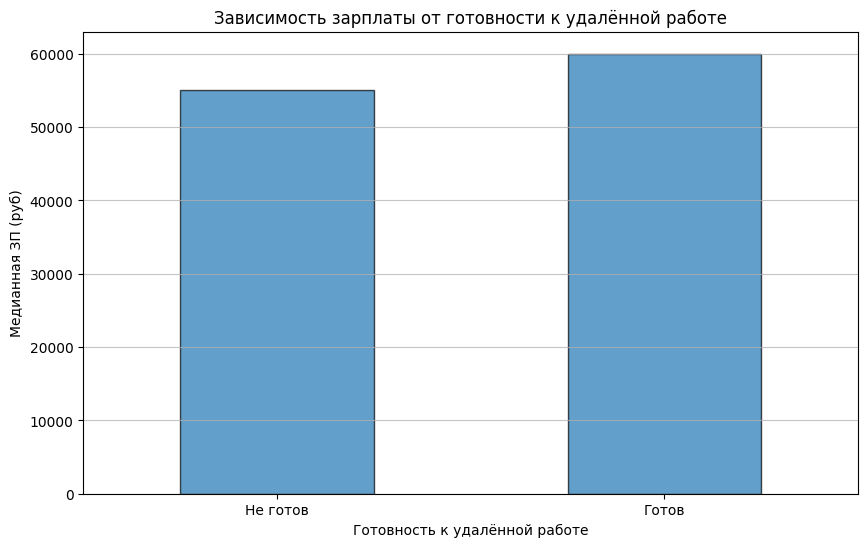

In [107]:
# Группировка данных по удалённой работе
remote_salary = filtered_data.groupby('удаленная работа')['ЗП (руб)'].median()

remote_salary.plot(kind='bar', figsize=(10, 6), edgecolor='black', alpha=0.7)
plt.title('Зависимость зарплаты от готовности к удалённой работе')
plt.xlabel('Готовность к удалённой работе')
plt.ylabel('Медианная ЗП (руб)')
plt.grid(axis='y', alpha=0.75)
plt.xticks([0, 1], ['Не готов', 'Готов'], rotation=0)
plt.show()


Выводы:
Соискатели, готовые к удалённой работе, в среднем запрашивают более высокую зарплату.
Готовность к удалённой работе становится важным фактором при прогнозировании зарплаты.

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [109]:
# ваш код здесь
duplicate_count = data.duplicated().sum()
data_cleaned = data.drop_duplicates()

print(f"Количество найденных полных дубликатов: {duplicate_count}")



Количество найденных полных дубликатов: 155


2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [110]:
# ваш код здесь
missing_values = data_cleaned.isnull().sum()
print("Количество пропусков в столбцах:")
print(missing_values)


Количество пропусков в столбцах:
Ищет работу на должность:            0
Опыт работы                        166
Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Обновление резюме                    0
Авто                                 0
Образование                          0
Пол                                  0
Возраст                              0
Опыт работы (месяц)                168
Город                                0
Готовность к переезду                0
Готовность к командировкам           0
полная занятость                     0
частичная занятость                  0
проектная работа                     0
волонтерство                         0
стажировка                           0
полный день                          0
сменный график                       0
гибкий график                        0
удаленная работа                     0
вахтовый метод                       0
ЗП (руб)                             0
Опыт работы (год)              

3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [111]:
# ваш код здесь
data_cleaned = data_cleaned.dropna(subset=['Последнее/нынешнее место работы', 'Последняя/нынешняя должность'])

median_experience = data_cleaned['Опыт работы (месяц)'].median()
data_cleaned['Опыт работы (месяц)'].fillna(median_experience, inplace=True)

print(f"Заполнено пропусков в 'Опыт работы (месяц)' медианным значением: {median_experience}")


Заполнено пропусков в 'Опыт работы (месяц)' медианным значением: 100.0


/var/folders/7q/7f88qphn1cg2hqssljwfvjgm0000gp/T/ipykernel_55728/3443529417.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_cleaned['Опыт работы (месяц)'].fillna(median_experience, inplace=True)


4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [112]:
# ваш код здесь
outliers = data_cleaned[(data_cleaned['ЗП (руб)'] > 1_000_000) | (data_cleaned['ЗП (руб)'] < 1_000)]
outliers_count = outliers.shape[0]
data_cleaned = data_cleaned[~((data_cleaned['ЗП (руб)'] > 1_000_000) | (data_cleaned['ЗП (руб)'] < 1_000))]

outliers_count



89

5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [113]:
# ваш код здесь
experience_outliers = data_cleaned[data_cleaned['Опыт работы (месяц)'] / 12 > data_cleaned['Возраст']]
experience_outliers_count = experience_outliers.shape[0]
data_cleaned = data_cleaned[~(data_cleaned['Опыт работы (месяц)'] / 12 > data_cleaned['Возраст'])]

experience_outliers_count


7

6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

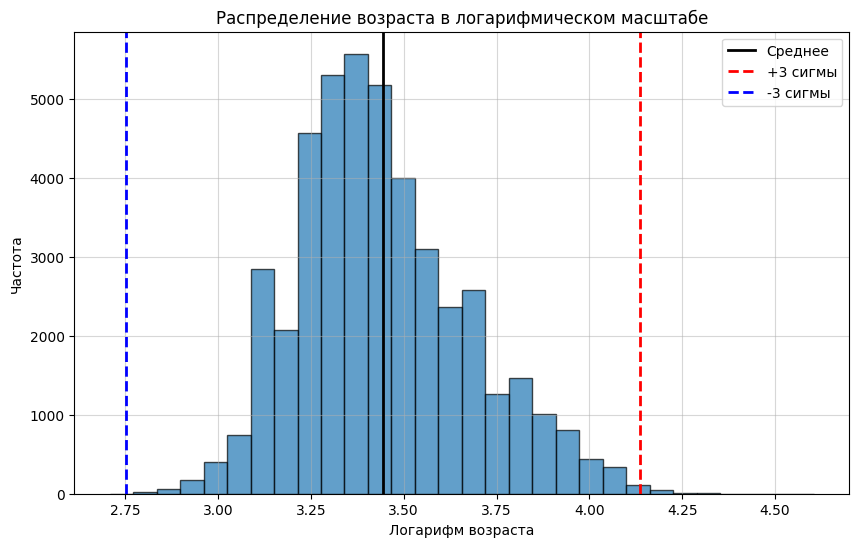

(3,
        Возраст
 31137       15
 32950       15
 33654      100)

In [114]:
# ваш код здесь
import numpy as np
import scipy.stats as stats

data_cleaned['log_Возраст'] = np.log(data_cleaned['Возраст'])

# Расчет среднего и стандартного отклонения
log_age_mean = data_cleaned['log_Возраст'].mean()
log_age_std = data_cleaned['log_Возраст'].std()

# Построение гистограммы
plt.figure(figsize=(10, 6))
histplot = plt.hist(data_cleaned['log_Возраст'], bins=30, edgecolor='black', alpha=0.7)
plt.axvline(log_age_mean, color='k', lw=2, label='Среднее')
plt.axvline(log_age_mean + 3 * log_age_std, color='r', linestyle='--', lw=2, label='+3 сигмы')
plt.axvline(log_age_mean - 3 * log_age_std, color='b', linestyle='--', lw=2, label='-3 сигмы')
plt.title('Распределение возраста в логарифмическом масштабе')
plt.xlabel('Логарифм возраста')
plt.ylabel('Частота')
plt.legend()
plt.grid(alpha=0.5)
plt.show()

z_scores = stats.zscore(data_cleaned['log_Возраст'])
outliers_z = data_cleaned[(z_scores > 4) | (z_scores < -3)]
data_cleaned = data_cleaned[~((z_scores > 4) | (z_scores < -3))]
outliers_z_count = outliers_z.shape[0]

outliers_z_count, outliers_z[['Возраст']]


ваш коммментарий здесь

Результаты показывают, что с помощью метода z-отклонений удалось выявить 3 выброса в данных по возрасту:

Возраст 15 лет: Два случая. Это, скорее всего, некорректные данные, поскольку такой возраст крайне необычен для активного поиска работы.
Возраст 100 лет: Один случай. Это тоже может быть ошибкой, так как 100 лет — экстремально преклонный возраст для трудовой деятельности.

In [115]:
# pandas save processed pd.DataFrame to csv
data.to_csv('data/dst-3.0_16_1_hh_database_processed.csv', index=False, sep=';')